# Example 1: Norway, Finse
S. Filhol, May 2023.

This example shows how to run a simple downscaling project and interact with the data. 

In [1]:
# Load librairies

from TopoPyScale import topoclass as tc
from TopoPyScale import topo_plot as plot
import matplotlib.pyplot as plt

import pprint

## 1. TopoPyScale Spatialized

In [2]:
# Load config file
config_file = './config_spatial.yml'
mp = tc.Topoclass(config_file)

---> Output directory cleaned
---> no FSM directory to clean
---> no ensemble directory to clean

---> DEM file found
{'latN': 60.68443065002782, 'latS': 60.50790355399738, 'lonW': 7.354447266990793, 'lonE': 7.731798660953054}
Project lat/lon extent:

	------------------------------
	|        North:60.7          |
	|West:7.4          East:7.7|
	|        South:60.5          |
	------------------------------


---> Loading ERA5 surf climate forcing
Start =  2018-Oct
End =  2018-Dec
ECWMF SURF data found:
0    SURF_201810.nc
1    SURF_201811.nc
2    SURF_201812.nc
Name: target_file, dtype: object


---> Loading ERA5 plev climate forcing
Start =  2018-Oct
End =  2018-Dec
ECWMF PLEV data found:
0    PLEV_201810.nc
1    PLEV_201811.nc
2    PLEV_201812.nc
Name: target_file, dtype: object


### 1.1. Print out configurations

In [3]:
# Print out config
print('--------- Project Configuration ------')
pprint.pprint(mp.config.project)
print('\n')
print('--------- Climate Data Configuration ------')
pprint.pprint(mp.config.climate)
print('\n')
print('--------- DEM Data Configuration ------')
pprint.pprint(mp.config.dem)
print('\n')
print('--------- Sampling Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- toposcale Configuration ------')
pprint.pprint(mp.config.sampling)
print('\n')
print('--------- Outputs Configuration ------')
pprint.pprint(mp.config.outputs)
print('\n')

--------- Project Configuration ------
{'CPU_cores': 4,
 'authors': ['Filhol S.', 'Aalstad K.', 'Fiddes J.'],
 'climate': 'era5',
 'date': 'Nov 2021',
 'description': 'Downscaling for Finse, Benchmarking TopoPyScale',
 'directory': '/home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/',
 'end': datetime.date(2018, 12, 31),
 'extent': {'latN': 60.68443065002782,
            'latS': 60.50790355399738,
            'lonE': 7.731798660953054,
            'lonW': 7.354447266990793},
 'name': 'Finse',
 'split': DefaultMunch({}, {'IO': False, 'time': 1, 'space': 'None'}),
 'start': datetime.date(2018, 10, 1)}


--------- Climate Data Configuration ------
{'era5': {'download_threads': 12,
          'path': 'inputs/climate/',
          'plevels': [700,
                      750,
                      775,
                      800,
                      825,
                      850,
                      875,
                      900,
                      925,
                      95

### 1.2. Load DEM and Compute Morphometrics

In [4]:
# Load DEM and derive terrain parameters
mp.compute_dem_param()


---> Extracting DEM parameters (slope, aspect, svf)
Computing slope and aspect ...
Computing svf ...
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/ds_param.nc saved


In [5]:
# All terrain data are contained into ds_param
mp.toposub.ds_param

<xarray.Dataset>
Dimensions:      (y: 192, x: 211)
Coordinates:
  * x            (x) float64 4.097e+05 4.098e+05 ... 4.306e+05 4.307e+05
  * y            (y) float64 6.728e+06 6.728e+06 ... 6.709e+06 6.709e+06
    spatial_ref  int64 0
Data variables:
    elevation    (y, x) float64 1.458e+03 1.453e+03 ... 1.23e+03 1.234e+03
    slope        (y, x) float64 0.06203 0.03416 0.03127 ... 0.07918 0.08959
    aspect       (y, x) float64 2.24 3.243 4.1 1.441 ... 3.317 2.778 2.942 3.573
    aspect_cos   (y, x) float64 -0.62 -0.9949 -0.5752 ... -0.9802 -0.9085
    aspect_sin   (y, x) float64 0.7846 -0.1012 -0.818 ... 0.3552 0.1982 -0.4179
    svf          (y, x) float64 0.9978 0.9985 0.9995 ... 0.9738 0.9754 0.9752
Attributes:
    description:  DEM input parameters to TopoSub
    author:       TopoPyScale, https://github.com/ArcticSnow/TopoPyScale

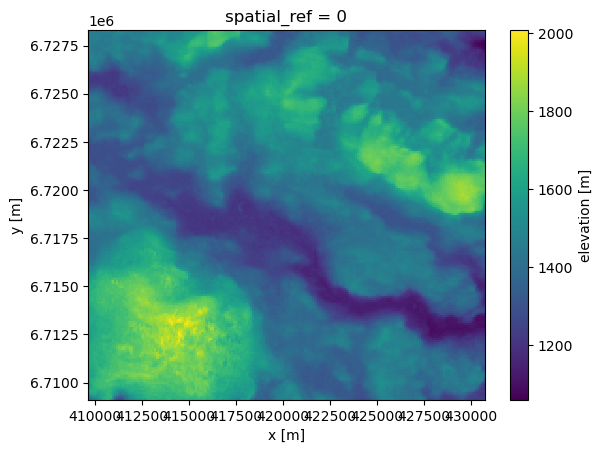

In [6]:
mp.toposub.ds_param.elevation.plot()

### 1.3. Segment DEM in Clusters

In [7]:
mp.extract_topo_param()

---> Scaling data prior to clustering
---> Clustering with Mini-Batch K-means in 10 clusters
---> Mini-Batch Kmean finished in 0.0s
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/ds_param.nc saved
Convert coordinates from EPSG:32632 to EPSG:4326
---> Centroids file df_centroids.pck saved


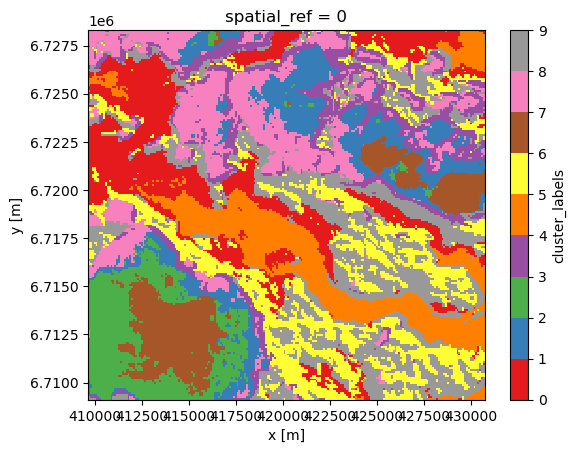

In [8]:
mp.toposub.ds_param.cluster_labels.plot(cmap=plt.cm.Set1)

In [9]:
print('Dataframe containing clusters average properties:\n')
mp.toposub.df_centroids

Dataframe containing clusters average properties:



,x,y,elevation,slope,aspect_cos,aspect_sin,svf,spatial_ref,aspect,point_id,lon,lat
0,417838.645902,6.721486e+06,1319.622364,0.135679,0.183631,-0.201754,0.979143,0.0,3.570426,0,7.498683,60.620763
1,420657.417428,6.720698e+06,1628.972519,0.210485,-0.081498,0.183036,0.972524,0.0,2.896662,1,7.550488,60.614260
2,413339.181537,6.712807e+06,1701.778961,0.139599,0.099174,-0.292740,0.981685,0.0,3.639818,2,7.420309,60.541926
3,421308.148646,6.722569e+06,1483.458797,0.273434,-0.054474,0.405232,0.953945,0.0,2.426760,3,7.561624,60.631183
4,422308.895489,6.717309e+06,1203.240239,0.134441,-0.072622,0.150801,0.969024,0.0,3.041541,4,7.581982,60.584170
5,422320.374075,6.716274e+06,1395.923241,0.138102,-0.577718,0.454075,0.981214,0.0,2.455586,5,7.582599,60.574876
6,418900.369232,6.715410e+06,1801.695149,0.192752,-0.070993,0.069873,0.971231,0.0,3.100398,6,7.520573,60.566445
7,418386.221430,6.723040e+06,1520.231798,0.137160,-0.131888,-0.415493,0.984904,0.0,3.772460,7,7.508040,60.634827
8,422718.794967,6.717580e+06,1426.247947,0.128679,0.511755,-0.392940,0.983544,0.0,4.044852,8,7.589355,60.586676
9,424461.988424,6.715879e+06,1324.694056,0.475337,0.104547,0.246309,0.908918,0.0,2.857891,9,7.621814,60.571745


### 1.4. Compute Solar Geometry

In [10]:
mp.compute_solar_geometry()


---> Computing solar geometry
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/ds_solar.nc saved


In [11]:
mp.ds_solar

<xarray.Dataset>
Dimensions:         (point_id: 10, time: 2208)
Coordinates:
  * point_id        (point_id) int64 0 1 2 3 4 5 6 7 8 9
  * time            (time) datetime64[ns] 2018-10-01 ... 2018-12-31T23:00:00
    reference_time  datetime64[ns] 2018-10-01
Data variables:
    zenith          (point_id, time) float64 2.128 2.084 2.007 ... 2.429 2.479
    azimuth         (point_id, time) float64 -2.935 -2.635 ... 2.555 2.927
    elevation       (point_id, time) float64 -0.5577 -0.5131 ... -0.8581 -0.9083
    mu0             (point_id, time) float64 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    SWtoa           (point_id, time) float64 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    sunset          (point_id, time) bool True True True True ... True True True

Text(0.5, 1.0, 'Solar Zenith')

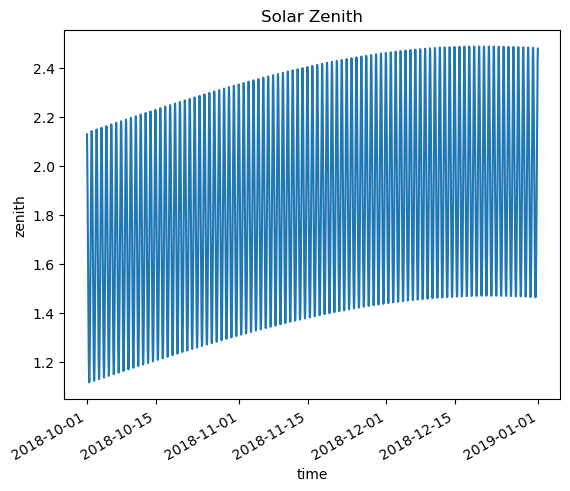

In [12]:
mp.ds_solar.zenith.sel(point_id=1).plot()
plt.title('Solar Zenith')

### 1.5. Compute Horizon Angles

In [13]:
mp.compute_horizon()


---> Computing horizons with 10 degree increments
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/da_horizon.nc saved
---> Centroids file df_centroids.pck updated with horizons


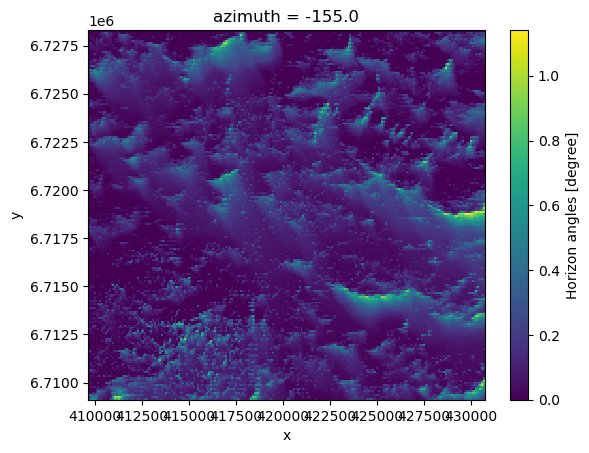

In [14]:
mp.da_horizon.isel(azimuth=2).plot()

### 1.6. Downscale Climate to Clusters

In [15]:
mp.downscale_climate()


---> Downscaling climate to list of points using TopoScale
/home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/tmp cleaned
No ERA5T  PRESSURE data present with additional dimension <expver>
Preparing plev for point 0
Preparing plev for point 1
Preparing plev for point 2
Preparing plev for point 3
Preparing plev for point 4
Preparing plev for point 5
Preparing plev for point 6
Preparing plev for point 7
Preparing plev for point 8
Preparing plev for point 9
No ERA5T  PRESSURE data present with additional dimension <expver>
Preparing surf for point 0
Preparing surf for point 1
Preparing surf for point 2
Preparing surf for point 3
Preparing surf for point 4
Preparing surf for point 5
Preparing surf for point 6
Preparing surf for point 7
Preparing surf for point 8
Preparing surf for point 9
Downscaling t,q,p,tp,ws,wd for point: 1Downscaling t,q,p,tp,ws,wd for point: 2

Downscaling t,q,p,tp,ws,wd for point: 4Downscaling t,q,p,tp,ws,wd for point: 3

---> Storing point 2 to out

In [16]:
mp.downscaled_pts

<xarray.Dataset>
Dimensions:            (time: 2208, point_id: 10)
Coordinates:
  * time               (time) datetime64[ns] 2018-10-01 ... 2018-12-31T23:00:00
  * point_id           (point_id) int32 0 1 2 3 4 5 6 7 8 9
    reference_time     datetime64[ns] 2018-10-01
Data variables: (12/17)
    t                  (point_id, time) float64 270.7 270.7 ... 270.4 269.6
    u                  (point_id, time) float64 2.732 2.435 ... 11.25 9.382
    v                  (point_id, time) float64 -0.6574 -0.7695 ... 1.358 2.145
    q                  (point_id, time) float64 0.00358 0.00356 ... 0.00311
    p                  (point_id, time) float64 8.547e+04 ... 8.455e+04
    precip_lapse_rate  (point_id, time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    ...                 ...
    cse                (point_id, time) float64 0.7073 0.7068 ... 0.6945 0.6952
    LW                 (point_id, time) float64 273.3 281.4 ... 280.7 254.9
    SW_diffuse         (point_id, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    cos_illumination   (point_id, time) float64 0.1119 0.1175 ... 0.2856 0.2808
    SW_direct          (point_id, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SW                 (point_id, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

### 1.7. Export Downscaled Timeseries to Desired Output Format
Here for instance, data are exported to `netcdf` files compatible with the model Cryogrid. Each file stores the timeseries for one given clusters. 

In [17]:
# Export to Cryogrid compatible format
mp.to_cryogrid()


---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_0.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_1.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_2.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_3.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_4.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_5.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_6.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_7.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_8.nc saved
---> File /home/simonfi/github/TopoPyScale_examples/ex1_norway_finse/outputs/Cryogrid_pt_9.nc saved


It is possible to extract the map of clusters as a GeoTIFF too with `mp.toposub.write_landform()` which would write a raster file you may open in a GIS software.

## 2. Plot Outputs

Suggestion: use divergent colormap plt.cm.RdBl_r centered around 0C


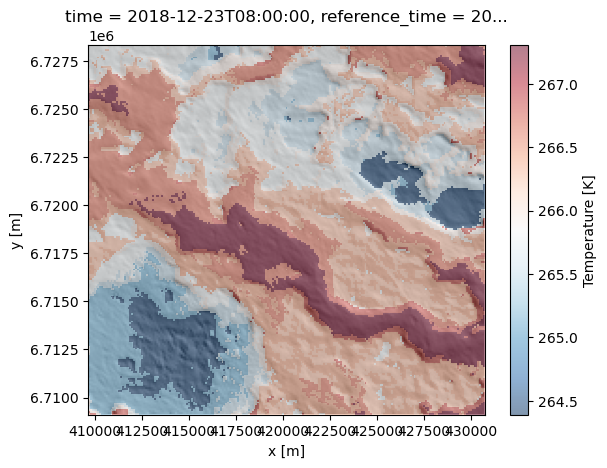

In [19]:
mp.plot.map_variable(time_step=2000)

Suggestion: use divergent colormap plt.cm.RdBl_r centered around 0C


Text(0.5, 1.0, 'Mean Surface Temperature [Oct-Nov-Dec]')

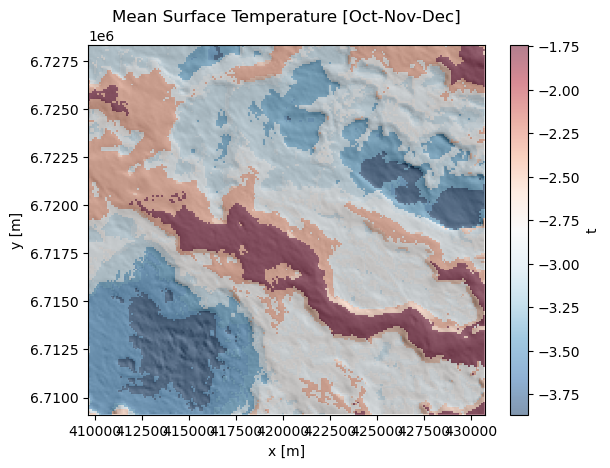

In [21]:
plot.map_variable((mp.downscaled_pts.t.mean(dim='time')-273.15), mp.toposub.ds_param)
plt.title('Mean Surface Temperature [Oct-Nov-Dec]')

Text(0, 0.5, 'Temperature [$^{o}C$]')

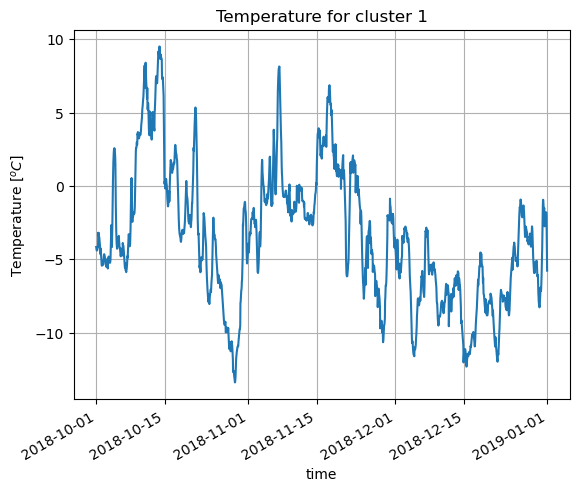

In [25]:
cluster_id = 1
(mp.downscaled_pts.t.sel(point_id=cluster_id)-273.15).plot()
plt.grid(':')
plt.title(f'Temperature for cluster {1}')
plt.ylabel('Temperature [$^{o}C$]')

Suggestion: use divergent colormap plt.cm.RdBl_r centered around 0C


Text(0.5, 1.0, 'Mean Longwave Radiations [W/m2]')

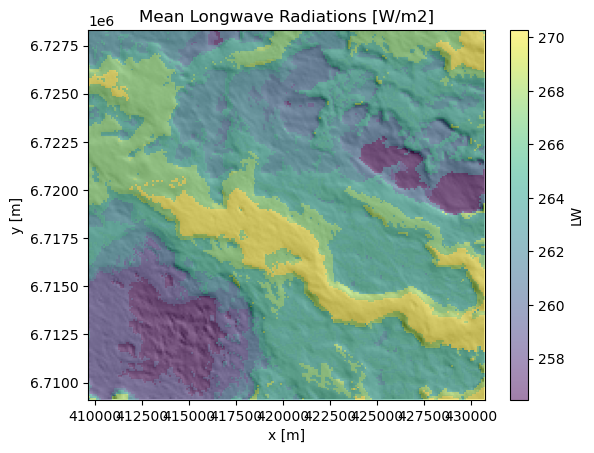

In [31]:
plot.map_variable((mp.downscaled_pts.LW.mean(dim='time')), mp.toposub.ds_param, cmap=plt.cm.inferno)
plt.title('Mean Longwave Radiations [W/m2]')

Suggestion: use divergent colormap plt.cm.RdBl_r centered around 0C


Text(0.5, 1.0, 'Max shortwave Radiations [W/m2]')

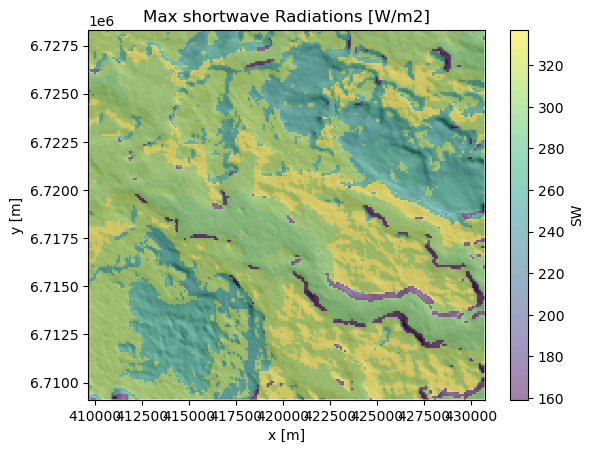

In [32]:
plot.map_variable((mp.downscaled_pts.SW.max(dim='time')), mp.toposub.ds_param, cmap=plt.cm.inferno)
plt.title('Max Shortwave Radiations [W/m2]')

## 3. Interactively Change Parameters 

In [1]:
print(f'Currently segmenting the DEM into: {mp.config.sampling.toposub.n_clusters} clusters')

NameError: name 'mp' is not defined

In [ ]:
mp.config.sampling.toposub.n_clusters = 30
mp.config.project.n_clusters = 10

In [ ]:
# First previous output must be removed
!rm -r ./outputs/
!mkdir outputs
!mkdir ./outputs/tmp
!mkdir ./outputs/downscaled

In [ ]:
# recompute segmentation for 30 clusters
mp.extract_topo_param()

# Compute solar geometry for the 30 clusters
mp.compute_solar_geometry()

mp.compute_horizon()

In [ ]:
mp.downscale_climate()

In [ ]:
plot.map_variable((mp.downscaled_pts.SW.max(dim='time')), mp.toposub.ds_param, cmap=plt.cm.inferno)
plt.title('Max Shortwave Radiations [W/m2] - 30 Clusters')

## 4. Find the Optimal Number of Clusters

This method makes use of the elbow method. 

In [ ]:
mp.search_optimum_number_of_clusters?

In [ ]:
import numpy as np
mp.search_optimum_number_of_clusters(cluster_range=np.arange(100,2000,100))

We see that at least 600 to 1000 clusters would be a good initial guess. As this demands lots of resources, we cannot perform such operation here. For large projects (many clusters and many years), it is possible to split the downscaling by a set number of years using the `split` option in the `config.yml` file. `TopoPyScale` will in this case recombine all timeseries together at the end of downscaling. 

In [ ]:
!rm ./outputs/ds_param.nc
!rm ./outputs/df_centroids.pck
mp.config.sampling.toposub.n_clusters = 1500
mp.compute_dem_param()
mp.extract_topo_param()
mp.toposub.ds_param.cluster_labels.plot(cmap=plt.cm.viridis)

In [ ]:
npix = mp.toposub.ds_param.elevation.shape[0]*mp.toposub.ds_param.elevation.shape[1]
print(f'{(1-np.round(mp.config.sampling.toposub.n_clusters/npix,2))*100}% gain in computation needs, if compaired to downscaling to every pixel in of the DEM')